In [4]:
%matplotlib inline
import numpy as N
import pylab as P
from astropy.table import Table, vstack, Column
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s

In [5]:
from astropy.cosmology import FlatLambdaCDM
#cosmo = FlatLambdaCDM(H0 = 71.0, Om0 = 0.26)
cosmo = FlatLambdaCDM(H0 = 75.0, Om0 = 0.3)
c = 299792.458 * u.km/u.s

In [6]:
import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

P.rc('figure', facecolor='none', edgecolor='none', autolayout=True)
P.rc('path', simplify=True)
P.rc('text', usetex=True)
P.rc('font', family='serif')
P.rc('axes', labelsize='large', facecolor='none', linewidth=0.7, color_cycle = ['k', 'r', 'g', 'b', 'c', 'm', 'y'])
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
P.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
P.rc('savefig', facecolor='none', edgecolor='none', frameon='False')

params =   {'font.size' : 14,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
P.rcParams.update(params) 

In [190]:
data= Table.read('mr181920_members_catalog_with_berlind_group_data_central_or_satellite_MPA_JHU_cent_mass_r200_rp_gz2-galex_best_fit_t_tau.fits', format='fits')

In [197]:
data = data[N.where(N.logical_and(N.logical_and(data['stellar mass of central']> 0, data['AVG_MASS_1']>0), data['REDSHIFT'] < 0.084))]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [198]:
len(data)

9482

In [199]:
sat = data[N.where(N.logical_and(data['central or satellite']==0, data['projected cluster centric radius'].to(u.Mpc)/data['virial radius r200'] < 10*un.Mpc))]
cent = data[N.where(data['central or satellite']==1)]

qsat = sat[N.where(sat['AVG_SFR_1']< sat['peng']-0.3)]
qcent = cent[N.where(cent['AVG_SFR_1']< cent['peng']-0.3)]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [201]:
print len(qsat), len(qcent)

3867 1564


In [11]:
fields = Table.read('field_cand_sample_matched_satellite_stellar_mass_bins_0.3_sfr_h_alpha_masses_balrdy_env_lt_-0.8_rv_gtr_25_MPA_JHU_sfrs.fits', format='fits')

In [12]:
fieldc = Table.read('field_cand_sample_matched_cent_groups_stellar_mass_bins_0.2_sfr_h_alpha_masses_balrdy_env_lt_-0.8_gt_-999_rv_gtr_25_bestfit_t_tau_MPA_JHU.fits', format='fits')

In [13]:
qfieldc = fieldc[N.where(N.logical_and(fieldc['AVG_SFR'] < fieldc['peng']-0.3, fieldc['t01_smooth_or_features_a01_smooth_debiased']>=0))]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [14]:
gz2 = Table.read('MPA_JHU_MASS_SFR.fit', format='fits')

### First let's make Figure 1 - the MASS against the SFR for centrals and satellites

In [15]:
H, X, Y = N.histogram2d(gz2['AVG_MASS'], gz2['AVG_SFR'], range=((8,12),(-2,2)), bins=55)
Hc, Xc, Yc = N.histogram2d(qcent['AVG_MASS_1'], qcent['AVG_SFR_1'], range=((8,12),(-2,2)), bins=20)
Hs, Xs, Ys = N.histogram2d(qsat['AVG_MASS_1'], qsat['AVG_SFR_1'], range=((8,12),(-2,2)), bins=20)

In [16]:
x = qcent['AVG_MASS_1']
y = qcent['AVG_SFR_1']
Xc, Yc = N.mgrid[8:12:30j, -2:2:30j]
pos = N.vstack([Xc.ravel(), Yc.ravel()])
density = kde.gaussian_kde(N.vstack([x,y]))
Hc = N.reshape(density(pos).T, Xc.shape)

In [17]:
x = qsat['AVG_MASS_1']
y = qsat['AVG_SFR_1']
Xs, Ys = N.mgrid[8:12:30j, -2:2:30j]
pos = N.vstack([Xs.ravel(), Ys.ravel()])
density = kde.gaussian_kde(N.vstack([x,y]))
Hs = N.reshape(density(pos).T, Xs.shape)

In [18]:
ms = N.linspace(1E8, 1E12, 51)
#sfr_138 = N.log10(peng_sfr(ms, cosmo.age(0).value))
sfr_138 = 0.857*N.log10(ms) - 8.4

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


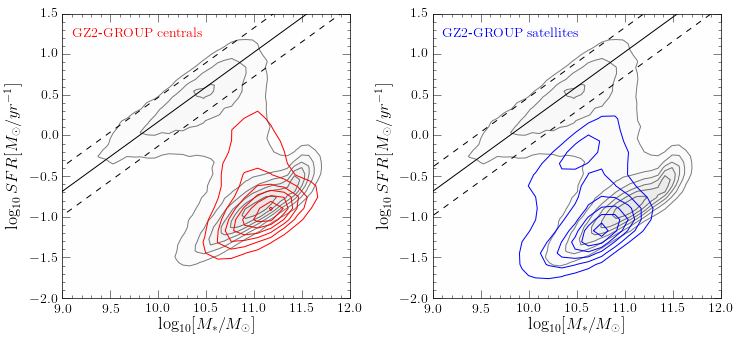

In [19]:
P.figure(figsize=(10.5,5))
ax1 = P.subplot(121)
ax1.minorticks_on()
ax1.contour(X[:-1], Y[:-1], H.T, origin='lower', colors='k', alpha=0.5)
ax1.contourf(X[:-1], Y[:-1], H.T, origin='lower', cmap=P.cm.Greys, alpha=0.1)
ax1.contour(Xc, Yc, Hc, origin='lower', colors='r')
ax1.plot(N.log10(ms), sfr_138, color='k')
ax1.plot(N.log10(ms), sfr_138+0.3, color='k', linestyle='dashed')
ax1.plot(N.log10(ms), sfr_138-0.3, color='k', linestyle='dashed')
# ax1.scatter(qcent['AVG_MASS'], qcent['AVG_SFR'], color='r', marker='s', alpha=0.5)
# ax1.scatter(qsat['AVG_MASS'], qsat['AVG_SFR'], color='k', marker='x', alpha=0.3)
ax1.set_xlabel(r'$\log_{10}[M_*/M_{\odot}]$')
ax1.set_ylabel(r'$\log_{10}SFR [M_{\odot}/yr^{-1}]$')
ax1.set_xlim(9, 12)
ax1.set_ylim(-2,1.5)
ax1.text(9.1, 1.2, r'$\rm{GZ2}$-$\rm{GROUP}$ $\rm{centrals}$', color='r')
ax1 = P.subplot(122)
ax1.minorticks_on()
ax1.contour(X[:-1], Y[:-1], H.T, origin='lower', colors='k', alpha=0.5)
ax1.contourf(X[:-1], Y[:-1], H.T, origin='lower', cmap=P.cm.Greys, alpha=0.1)
ax1.contour(Xs, Ys, Hs, origin='lower', colors='b')
ax1.plot(N.log10(ms), sfr_138, color='k')
ax1.plot(N.log10(ms), sfr_138+0.3, color='k', linestyle='dashed')
ax1.plot(N.log10(ms), sfr_138-0.3, color='k', linestyle='dashed')
# ax1.scatter(qcent['AVG_MASS'], qcent['AVG_SFR'], color='r', marker='s', alpha=0.5)
# ax1.scatter(qsat['AVG_MASS'], qsat['AVG_SFR'], color='k', marker='x', alpha=0.3)
ax1.set_xlabel(r'$\log_{10}[M_*/M_{\odot}]$')
ax1.set_ylabel(r'$\log_{10}SFR [M_{\odot}/yr^{-1}]$')
ax1.set_xlim(9, 12)
ax1.set_ylim(-2,1.5)
ax1.text(9.1, 1.2, r'$\rm{GZ2}$-$\rm{GROUP}$ $\rm{satellites}$', color='b')
P.tight_layout()
P.savefig('sfr_mass_quenched_centrals_satellites_gz2_group.pdf')

### Now let's look at Figure 2 - the redshift distributions of the field matched sample 

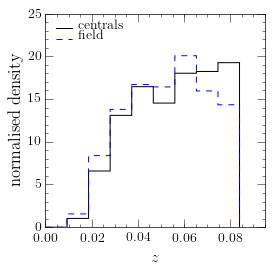

In [20]:
linetypes = ['solid','dashed']
colours = ['k', 'b']
labels=[r'$\rm{centrals}$', r'$\rm{field}$']
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.hist(qcent['REDSHIFT'], bins=9, range=(0, 0.084), histtype='step', color='k', normed=True, lw=1)
ax.hist(qfieldc['REDSHIFT_1'], bins=9, range=(0, 0.084), histtype='step', color='b', linestyle='dashed', normed=True, lw=1)
for n in range(2):
    ax.axhline((0.725+(0.2*(4-float(n))/4))*25.15, 0.05, 0.12, linestyle=linetypes[n],color=colours[n], lw=1)
    ax.text(0.15, 0.725+(0.2*(4-n)/4), labels[n], transform=ax.transAxes, fontsize=14)
#ax.hist(cent_t_since, bins=20, range=(0, 9), histtype='step', color='r', normed=True, label='quenching centrals')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\rm{normalised}$ $\rm{density}$')
ax.minorticks_on()
ax.set_xlim(0, 0.095)
P.savefig('redshift_cent_field.pdf')

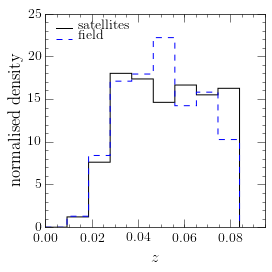

In [21]:
linetypes = ['solid','dashed']
colours = ['k', 'b']
labels=[r'$\rm{satellites}$', r'$\rm{field}$']
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.hist(qsat['REDSHIFT'], bins=9, range=(0, 0.084), histtype='step', color='k', normed=True, lw=1)
ax.hist(fields['REDSHIFT'], bins=9, range=(0, 0.084), histtype='step', color='b', linestyle='dashed', normed=True, lw=1)
for n in range(2):
    ax.axhline((0.725+(0.2*(4-float(n))/4))*25.15, 0.05, 0.12, linestyle=linetypes[n],color=colours[n], lw=1)
    ax.text(0.15, 0.725+(0.2*(4-n)/4), labels[n], transform=ax.transAxes, fontsize=14)
#ax.hist(cent_t_since, bins=20, range=(0, 9), histtype='step', color='r', normed=True, label='quenching centrals')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\rm{normalised}$ $\rm{density}$')
ax.minorticks_on()
ax.set_xlim(0, 0.095)
P.savefig('redshift_sat_field.pdf')

### Now let's look at Figure 3 - the average stellar mass with redshift 

In [215]:
logbins = N.append(N.linspace(0, 1, 6),  N.linspace(2, 10, 5), axis=0)

In [276]:
bsmass25 = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['AVG_MASS_1'], statistic=lambda y: N.percentile(y, 16), bins=logbins)
bsmass50 = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['AVG_MASS_1'], statistic=lambda y: N.percentile(y, 50), bins=logbins)
bsmass75 = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['AVG_MASS_1'], statistic=lambda y: N.percentile(y, 84), bins=logbins)

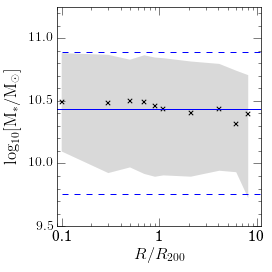

In [277]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bsmass50[1][:-1] + N.diff(bsmass50[1])[0]/2, bsmass50[0], marker='x', color='k')
ax.fill_between(bsmass50[1][:-1] + N.diff(bsmass50[1])[0]/2, bsmass25[0], bsmass75[0], color='k', alpha=0.15, edgecolor='None')
ax.hlines(N.percentile(fields['AVG_MASS'], [16, 50, 84]), 0, 14, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 11)
#ax.set_ylim(0, 0.05)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{\log_{10}[M_{*}/M_{\odot}]}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.set_ylim(9.5, 11.25)
P.tight_layout()
P.savefig('mass_trend_with_log_radius_compare_field.pdf', frameon=False, bbox_inches='tight', pad_inches=0.1, transparent=True)

### Now let's look at Figure 4 - how do p_disc and p_smooth change with radius?

In [ ]:
def prange(x):
    return N.percentile(x, [84])
def mrange(x):
    return N.percentile(x, [16])
def sem(x):
    return N.std(x)/N.sqrt(float(len(x)))

In [268]:
bsd = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a02_features_or_disk_debiased'], statistic='mean', bins=logbins, range=(0,10))
bsdstd = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a02_features_or_disk_debiased'], statistic=sem, bins=logbins, range=(0,10))
y1d = bsd[0] + bsdstd[0]
y2d = bsd[0] - bsdstd[0]
bss = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a01_smooth_debiased'], statistic='mean', bins=logbins, range=(0,10))
bssstd = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t01_smooth_or_features_a01_smooth_debiased'], statistic=sem, bins=logbins, range=(0,10))
y1s = bss[0] + bssstd[0]
y2s = bss[0] - bssstd[0]

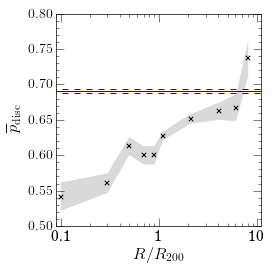

In [270]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bsd[1][:-1] + N.diff(bsd[1])[0]/2, bsd[0], marker='x', color='k')
ax.fill_between(bsd[1][:-1] + N.diff(bsd[1])[0]/2, y1d, y2d, color='k', alpha=0.15, edgecolor='None')
ax.hlines([N.mean(fields['t01_smooth_or_features_a02_features_or_disk_debiased'])-sem(fields['t01_smooth_or_features_a02_features_or_disk_debiased']), N.mean(fields['t01_smooth_or_features_a02_features_or_disk_debiased']), N.mean(fields['t01_smooth_or_features_a02_features_or_disk_debiased'])+sem(fields['t01_smooth_or_features_a02_features_or_disk_debiased'])], 0, 14, color='b', linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 11)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\overline{p}_{\rm{disc}}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.savefig('p_disc_trend_with_log_radius_field_compare.pdf')

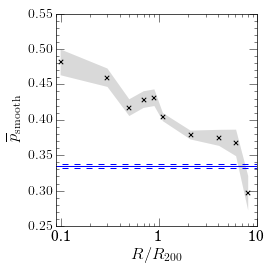

In [271]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bss[1][:-1] + N.diff(bss[1])[0]/2, bss[0], marker='x', color='k')
ax.fill_between(bss[1][:-1] + N.diff(bss[1])[0]/2, y1s, y2s, color='k', alpha=0.15, edgecolor='None')
ax.hlines([N.mean(fields['t01_smooth_or_features_a01_smooth_debiased'])+sem(fields['t01_smooth_or_features_a01_smooth_debiased']), N.mean(fields['t01_smooth_or_features_a01_smooth_debiased']), N.mean(fields['t01_smooth_or_features_a01_smooth_debiased'])-sem(fields['t01_smooth_or_features_a01_smooth_debiased'])], 0, 14, color='b', linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 10)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\overline{p}_{\rm{smooth}}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.savefig('p_smooth_trend_with_log_radius_field_compare.pdf')

### Now for Figure 5 - how the bar fraciton changes with radius

In [28]:
discs = sat[N.where(N.logical_and(sat['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.430, sat['t02_edgeon_a05_no_debiased']>0.715, sat['t02_edgeon_a05_no_count']>=20))]

In [29]:
discsf = fields[N.where(N.logical_and(fields['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.430, fields['t02_edgeon_a05_no_debiased']>0.715, fields['t02_edgeon_a05_no_count']>=20))]

In [30]:
maxm = N.max(discs['AVG_MASS_1'])
minm = N.min(discs['AVG_MASS_1'])
hweight = (discs['AVG_MASS_1']-minm)/(maxm-minm)
lweight = 1 - hweight

In [31]:
bso = b_s((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], sat['t06_odd_a14_yes_debiased'], statistic='median', bins=logbins, range=(0,15))

In [32]:
idxrs = N.digitize((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], logbins)
idxds = N.digitize((discs['projected cluster centric radius'].to(u.Mpc))/discs['virial radius r200'], logbins)
frac_b = [len(discs[discs['t03_bar_a06_bar_debiased'][idxds==k]>=0.6])/float(len(discs[idxds==k])+1) for k in range(len(logbins))]
frac_bl = [N.sum(lweight[discs['t03_bar_a06_bar_debiased'][idxds==k]>=0.6])/float(len(discs[idxds==k])+1) for k in range(len(logbins))]
num_b = [float(len(discs[discs['t03_bar_a06_bar_debiased'][idxds==k]>=0.6])) for k in range(len(logbins))]
num_t = [float(len(discs[idxds==k])+1) for k in range(len(logbins))]
error_frac_b = N.nan_to_num(frac_b*N.sqrt((1/N.array(num_b))+(1/N.array(num_t))))
y1eb = frac_b + error_frac_b
y2eb = frac_b - error_frac_b
frac_bar_field = len(discsf[discsf['t03_bar_a06_bar_debiased']>=0.6])/float(len(discsf)+1)
num_bf = [float(len(discsf[discsf['t03_bar_a06_bar_debiased']>=0.6]))]
num_tf = [float(len(discsf)+1)]
error_frac_bar_field = N.nan_to_num(frac_bar_field*N.sqrt((1/N.array(num_bf))+(1/N.array(num_tf))))
y1ebarf = frac_bar_field + error_frac_bar_field
y2ebarf = frac_bar_field - error_frac_bar_field

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


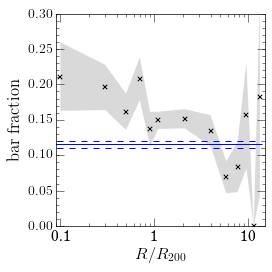

In [34]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_b[1:], marker='x', color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1eb[1:], y2eb[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1ebarf, frac_bar_field, y2ebarf], 0, 14, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(ymin=0.0, ymax=0.3)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{bar}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('bar_fraction_over_disc_trend_with_log_radius_sat_matched_field_cand.pdf')

### Now let's look at Figure 6 - the merger fraction 

In [35]:
idxrs = N.digitize((sat['projected cluster centric radius'].to(u.Mpc))/sat['virial radius r200'], logbins)
frac_m = [len(sat[sat['t08_odd_feature_a24_merger_debiased'][idxrs==k]>=0.3])/float(len(sat[idxrs==k])+1) for k in range(len(logbins))]
num_m = [float(len(sat[sat['t08_odd_feature_a24_merger_debiased'][idxrs==k]>=0.3])) for k in range(len(logbins))]
num_t = [float(len(sat[idxrs==k])+1) for k in range(len(logbins))]
error_frac_m = N.nan_to_num(frac_m*N.sqrt((1/N.array(num_m))+(1/N.array(num_t))))
y1em = frac_m + error_frac_m
y2em = frac_m - error_frac_m
frac_m_field = len(fields[fields['t08_odd_feature_a24_merger_debiased']>=0.3])/float(len(fields))
error_frac_m_field = N.nan_to_num(frac_m_field*N.sqrt((1/float(len(fields[fields['t08_odd_feature_a24_merger_debiased']>=0.4])))+(1/float(len(fields)))))
y1emf = frac_m_field + error_frac_m_field
y2emf = frac_m_field - error_frac_m_field

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


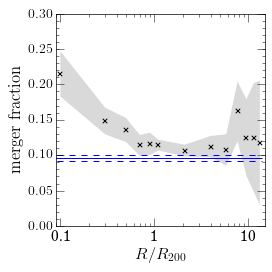

In [36]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_m[1:], marker='x', color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1em[1:], y2em[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1emf, frac_m_field, y2emf], 0, 14, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(ymin=0)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{merger}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('merger_fraction_trend_with_log_radius_compare_field.pdf')

### Now let's look at Figure 7- bulge fraction with radius

In [37]:
lim = 0.5
idxs = N.digitize((discs['projected cluster centric radius'].to(u.Mpc))/discs['virial radius r200'], logbins)
num_t = [float(len(data[idxs==k])+1) for k in range(len(logbins))]
frac_nb = [len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_nb = [float(len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_nb = N.nan_to_num(frac_nb*N.sqrt((1/N.array(num_nb))+(1/N.array(num_t))))
y1enb = frac_nb + error_frac_nb
y2enb = frac_nb - error_frac_nb
frac_jnb = [len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_jnb = [float(len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_jnb = N.nan_to_num(frac_jnb*N.sqrt((1/N.array(num_jnb))+(1/N.array(num_t))))
y1ejnb = frac_jnb + error_frac_jnb
y2ejnb = frac_jnb - error_frac_jnb
frac_ob = [len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_ob = [float(len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_ob = N.nan_to_num(frac_ob*N.sqrt((1/N.array(num_ob))+(1/N.array(num_t))))
y1eob = frac_ob + error_frac_ob
y2eob = frac_ob - error_frac_ob
frac_db = [len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim])/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_db = [float(len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_db = N.nan_to_num(frac_db*N.sqrt((1/N.array(num_db))+(1/N.array(num_t))))
y1edb = frac_db + error_frac_db
y2edb = frac_db - error_frac_db
frac_minb = [(len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim]))/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_minb = [float(len(discs[discs['t05_bulge_prominence_a10_no_bulge_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a11_just_noticeable_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_minb = N.nan_to_num(frac_minb*N.sqrt((1/N.array(num_minb))+(1/N.array(num_t))))
l_frac_minb = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_minb,num_t) 
y1eminb = frac_minb + error_frac_minb
y2eminb = frac_minb - error_frac_minb
frac_maxb = [(len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim]))/float(len(discs[idxs==k])+1) for k in range(len(logbins))]
num_maxb = [float(len(discs[discs['t05_bulge_prominence_a12_obvious_debiased'][idxs==k]>=lim])+len(discs[discs['t05_bulge_prominence_a13_dominant_debiased'][idxs==k]>=lim])) for k in range(len(logbins))]
error_frac_maxb = N.nan_to_num(frac_maxb*N.sqrt((1/N.array(num_maxb))+(1/N.array(num_t))))
l_frac_maxb = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_maxb,num_t) 
y1emaxb = frac_maxb + error_frac_maxb
y2emaxb = frac_maxb - error_frac_maxb

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__mai

In [38]:
num_tf = [float(len(discsf)+1)]
frac_minbf = [(len(discsf[discsf['t05_bulge_prominence_a10_no_bulge_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a11_just_noticeable_debiased']>=lim]))/float(len(discsf)+1)]
num_minbf = [float(len(discsf[discsf['t05_bulge_prominence_a10_no_bulge_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a11_just_noticeable_debiased']>=lim]))]
error_frac_minbf = N.nan_to_num(frac_minbf*N.sqrt((1/N.array(num_minbf))+(1/N.array(num_tf))))
l_frac_minbf = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_minbf,num_tf) 
y1eminbf = frac_minbf + error_frac_minbf
y2eminbf = frac_minbf - error_frac_minbf
frac_maxbf = [(len(discsf[discsf['t05_bulge_prominence_a12_obvious_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a13_dominant_debiased']>=lim]))/float(len(discsf)+1)]
num_maxbf = [float(len(discsf[discsf['t05_bulge_prominence_a12_obvious_debiased']>=lim])+len(discsf[discsf['t05_bulge_prominence_a13_dominant_debiased']>=lim]))]
error_frac_maxbf = N.nan_to_num(frac_maxbf*N.sqrt((1/N.array(num_maxbf))+(1/N.array(num_tf))))
l_frac_maxbf = map(lambda x,y: str(int(x))+'/'+str(int(y)), num_maxbf,num_tf) 
y1emaxbf = frac_maxbf + error_frac_maxbf
y2emaxbf = frac_maxbf - error_frac_maxbf


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


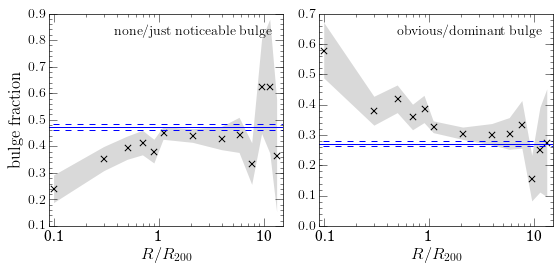

In [39]:
P.figure(figsize=(8,4))
ax = P.subplot(121)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_minb[1:], marker='x', s=40, color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1eminb[1:], y2eminb[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1eminbf, frac_minbf, y2eminbf], 0, 20, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
# for i, txt in enumerate(l_frac_minb[1:]):
#     ax.annotate(txt, ((bso[1][:-1] + N.diff(bso[1])[0]/2)[i]+0.03,frac_minb[1:][i]-0.02), fontsize=9)
ax.text(0.95, 0.9, r'$\rm{none}/\rm{just}$ $\rm{noticeable}$ $\rm{bulge}$', ha='right',transform=ax.transAxes)
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(0.1, 0.9)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\rm{bulge}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.legend(frameon=False)
ax = P.subplot(122)
ax.scatter(bso[1][:-1] + N.diff(bso[1])[0]/2, frac_maxb[1:], marker='x', s=40, color='k')
ax.fill_between(bso[1][:-1] + N.diff(bso[1])[0]/2, y1emaxb[1:], y2emaxb[1:], color='k', alpha=0.15, edgecolor='None')
ax.hlines([y1emaxbf, frac_maxbf, y2emaxbf], 0, 20, color=['b', 'b','b'], linestyle=['dashed', 'solid', 'dashed'])
# for i, txt in enumerate(l_frac_maxb[1:]):
#     ax.annotate(txt, ((bso[1][:-1] + N.diff(bso[1])[0]/2)[i]+0.03,frac_maxb[1:][i]-0.03), fontsize=9, color='k')
ax.text(0.95, 0.9, r'$\rm{obvious}/\rm{dominant}$ $\rm{bulge}$', ha='right',transform=ax.transAxes)
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 15)
ax.set_ylim(0.0, 0.7)
ax.set_xlabel(r'$R/R_{200}$')
#ax.set_ylabel(r'$\rm{bulge}$ $\rm{fraction}$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
ax.legend(frameon=False)
P.tight_layout()
P.savefig('min_max_bulge_fraction_trend_with_log_radius_all_field_cand.pdf')

### Now let's make Figures 8-10 looking at how t and tau change with radius 

In [40]:
from scipy.stats import binned_statistic_2d as bs2d
from scipy.stats import binned_statistic as bs
from astropy import units as un

In [41]:
qfieldc = fieldc[N.where(fieldc['AVG_SFR']<fieldc['peng']-0.3)]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [42]:
sat_t_since = cosmo.age(qsat['REDSHIFT']).value - qsat['best fit t']
sat_t_since_min = cosmo.age(qsat['REDSHIFT']).value - (qsat['best fit t'] + qsat['plus error t'])
sat_t_since_max = cosmo.age(qsat['REDSHIFT']).value - (qsat['best fit t'] - qsat['minus error t'])
cent_t_since = cosmo.age(qcent['REDSHIFT']).value - qcent['best fit t']
cent_t_since_min = cosmo.age(qcent['REDSHIFT']).value - (qcent['best fit t'] + qcent['plus error t'])
cent_t_since_max = cosmo.age(qcent['REDSHIFT']).value - (qcent['best fit t'] - qcent['minus error t'])
field_t_since = cosmo.age(qfieldc['z_1']).value - qfieldc['best fit t']
field_t_since_min = cosmo.age(qfieldc['z_1']).value - qfieldc['plus error t']
field_t_since_max = cosmo.age(qfieldc['z_1']).value - qfieldc['minus error t']

The bin boundaries need changing compared to the previous plots in order to better split the sample into roughly thirds in each case. The distributions were inspected in TOPCAT and by eye the bin boundaries were decided to give appropriately split the sample in each parameter's case.  

In [43]:
r_bins = N.append(N.append(N.linspace(0.1, 1, 6),  N.linspace(2, 10, 5), axis=0), 400)
mc_bins = N.array([9, 10.75, 11.25, 12])
m_bins = N.array([9, 10.25, 10.75, 12])
N_bins = N.array([3, 5, 15, 400])
v_bins = N.array([0, 100, 200, 400])
mu_bins = N.array([-2, -0.75, -0.25, 1])
delv_bins = N.array([0, 150, 350, 1000])

In [44]:
bs_m_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], sat_t_since, bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], sat_t_since_min, bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], sat_t_since_max, bins=(r_bins, m_bins), statistic='median')
bs_mc_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], sat_t_since, bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], sat_t_since_min, bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], sat_t_since_max, bins=(r_bins, mc_bins), statistic='median')
bs_N_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], sat_t_since, bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], sat_t_since_min, bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], sat_t_since_max, bins=(r_bins, N_bins), statistic='median')

In [45]:
bs_m_qcent, x, n = bs(qcent['AVG_MASS_1'], cent_t_since, bins=m_bins, statistic='median')
bs_m_qcent_min, x, n = bs(qcent['AVG_MASS_1'], cent_t_since_min, bins=m_bins, statistic='median')
bs_m_qcent_max, x, n = bs(qcent['AVG_MASS_1'], cent_t_since_max, bins=m_bins, statistic='median')
bs_mc_qcent, x, n = bs(qcent['stellar mass of central'], cent_t_since, bins=mc_bins, statistic='median')
bs_mc_qcent_min, x, n = bs(qcent['stellar mass of central'], cent_t_since_min, bins=mc_bins, statistic='median')
bs_mc_qcent_max, x, n = bs(qcent['stellar mass of central'], cent_t_since_max, bins=mc_bins, statistic='median')
bs_N_qcent, x, n = bs(qcent['N group'], cent_t_since, bins=N_bins, statistic='median')
bs_N_qcent_min, x, n = bs(qcent['N group'], cent_t_since_min, bins=N_bins, statistic='median')
bs_N_qcent_max, x, n = bs(qcent['N group'], cent_t_since_max, bins=N_bins, statistic='median')

In [46]:
bs_m_qfield, x, n = bs(qfieldc['stellar mass'], field_t_since, bins=m_bins, statistic='median')
bs_m_qfield_min, x, n = bs(qfieldc['stellar mass'], field_t_since_min, bins=m_bins, statistic='median')
bs_m_qfield_max, x, n = bs(qfieldc['stellar mass'], field_t_since_max, bins=m_bins, statistic='median')
bs_mc_qfield, x, n = bs(qfieldc['stellar mass'], field_t_since, bins=mc_bins, statistic='median')
bs_mc_qfield_min, x, n = bs(qfieldc['stellar mass'], field_t_since_min, bins=mc_bins, statistic='median')
bs_mc_qfield_max, x, n = bs(qfieldc['stellar mass'], field_t_since_max, bins=mc_bins, statistic='median')
bs_N_qfield = N.ones_like(bs_mc_qfield)*N.median(field_t_since)
bs_N_qfield_min, x, n = bs(qfieldc['stellar mass'], field_t_since_min, bins=N_bins, statistic='median')
bs_N_qfield_max, x, n = bs(qfieldc['stellar mass'], field_t_since_max, bins=N_bins, statistic='median')

In [47]:
bs_v_disp_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], sat_t_since, bins=(r_bins, v_bins), statistic='median')
bs_mu_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), sat_t_since, bins=(r_bins, mu_bins), statistic='median')
bs_delv_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.abs(qsat['delta v from central']), sat_t_since, bins=(r_bins, delv_bins), statistic='median')
bs_v_disp_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], sat_t_since_min, bins=(r_bins, v_bins), statistic='median')
bs_v_disp_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], sat_t_since_max, bins=(r_bins, v_bins), statistic='median')
bs_mu_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), sat_t_since_min, bins=(r_bins, mu_bins), statistic='median')
bs_mu_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), sat_t_since_max, bins=(r_bins, mu_bins), statistic='median')
bs_delv_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], sat_t_since_min, bins=(r_bins, delv_bins), statistic='median')
bs_delv_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], sat_t_since_max, bins=(r_bins, delv_bins), statistic='median')

bs_v_disp_qcent, x, n = bs(qcent['V_DISP_1'], cent_t_since, bins=v_bins, statistic='median')
bs_mu_qcent, x, n = bs(N.zeros(len(qcent)), cent_t_since, bins=mu_bins, statistic='median')
bs_delv_qcent, x, n = bs(qcent['delta v from central'], cent_t_since, bins=v_bins, statistic='median')
bs_v_disp_qcent_min, x, n = bs(qcent['V_DISP_1'], cent_t_since_min, bins=v_bins, statistic='median')
bs_v_disp_qcent_max, x, n = bs(qcent['V_DISP_1'], cent_t_since_max, bins=v_bins, statistic='median')

bs_v_disp_qfield, x, n = bs(qfieldc['V_DISP'], field_t_since, bins=v_bins, statistic='median')
bs_mu_qfield, x, n = bs(N.zeros(len(qfieldc)), field_t_since, bins=mu_bins, statistic='median')
bs_v_disp_qfield_min, x, n = bs(qfieldc['V_DISP'], field_t_since_min, bins=v_bins, statistic='median')
bs_v_disp_qfield_max, x, n = bs(qfieldc['V_DISP'], field_t_since_max, bins=v_bins, statistic='median')

In [48]:
colours = ['blue', 'black', 'red']

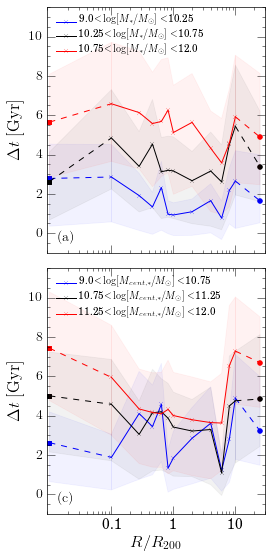

In [49]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(m_bins)-1):
    ax1.plot(r_bins[:-1], bs_m_qsat[:,n], marker='x', color=colours[n], label=r''+str(m_bins[n])+'$ < \log [M_*/M_{\odot}] < $'+str(m_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_m_qsat_min[:,n], y2=bs_m_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.errorbar(r_bins[:-1], bs_m_qsat[:,n], yerr = [bs_m_qsat_min[:,n], bs_m_qsat_max[:,n]], marker='None', fmt='None', ecolor=colours[n], alpha=0.8)
    ax1.plot([0.01, r_bins[0]], [bs_m_qcent[n], bs_m_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_m_qcent_min[n], bs_m_qsat_min[0,n]], y2=[bs_m_qcent_max[n], bs_m_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_m_qsat[-1,n], bs_m_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_m_qsat_min[-1,n], bs_m_qfield_min[n]], y2=[bs_m_qsat_max[-1,n], bs_m_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_m_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_m_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot([r_bins[-4], r_bins[-2]], [bs_m_qsat[-3,n], bs_m_qsat[-1,n]], marker='None', color=colours[n], linewidth=1)
#ax1.fill_between([r_bins[-4], r_bins[-2]], y1=[bs_m_qsat_min[-3, n], bs_m_qsat_min[-1,n]], y2=[bs_m_qsat_max[-3, n], bs_m_qsat_max[-1,n]], color=colours[n], alpha=0.05)
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
ax1.text(0.05, 0.05, r'$\rm(a)$', transform=ax1.transAxes, ha='left', color='k')
#ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1 = P.subplot(212)
for n in range(0, len(mc_bins)-1):
    ax1.plot(r_bins[:-1], bs_mc_qsat[:,n], marker='x', color=colours[n], label=r''+str(mc_bins[n])+'$ < \log [M_{cent,*}/M_{\odot}] < $'+str(mc_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mc_qsat_min[:,n], y2=bs_mc_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_mc_qcent[n], bs_mc_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_mc_qsat[-1,n], bs_mc_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_min[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_mc_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_mc_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
#ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(c)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('time_since_quenching_M*_Mh_new.pdf', facecolor='None', edgecolor='None')

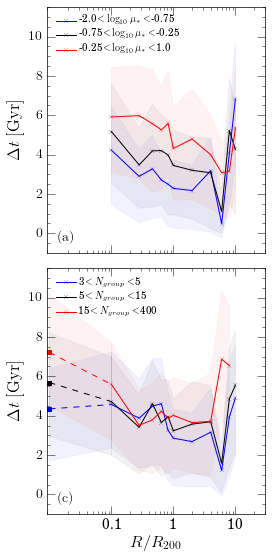

In [50]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(212)
for n in range(0, len(N_bins)-1):
    ax1.plot(r_bins[:-1], bs_N_qsat[:,n], marker='x', color=colours[n], label=r''+str(N_bins[n])+'$ < N_{group} < $'+str(N_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_N_qsat_min[:,n], y2=bs_N_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_N_qcent[n], bs_N_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_N_qcent_min[n], bs_N_qsat_min[0,n]], y2=[bs_N_qcent_max[n], bs_N_qsat_max[0,n]], color=colours[n], alpha=0.05)    
    #ax1.plot([r_bins[-2], 25], [bs_N_qsat[-1,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_N_qsat_min[-1,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-1,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
    ax1.scatter(0.01, bs_N_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_N_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot([r_bins[-5], 25], [bs_N_qsat[-4,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
#ax1.fill_between([r_bins[-5], 25], y1=[bs_N_qsat_min[-4,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-4,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.set_xlabel(r'$R/R_{200}$')
ax1.text(0.05, 0.05, r'$\rm(c)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_mu_qsat[:,n], marker='x', color=colours[n], label=r''+str(mu_bins[n])+'$ < \log_{10}{\mu_*} < $'+str(mu_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mu_qsat_min[:,n], y2=bs_mu_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.05)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(a)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('time_since_quenching_mu_Ngroup_new.pdf')

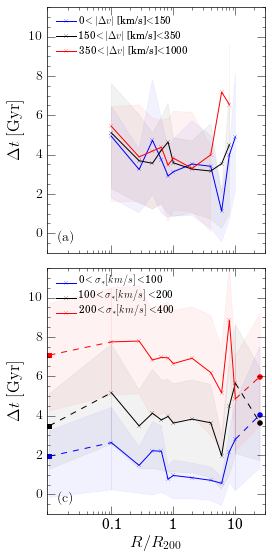

In [51]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_delv_qsat[:,n], marker='x', color=colours[n], label=r''+str(delv_bins[n])+'$ <|\Delta v|$ [km/s]$ < $'+str(delv_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_delv_qsat_min[:,n], y2=bs_delv_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.2)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.2)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(a)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(212)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_v_disp_qsat[:,n], marker='x', color=colours[n], label=r''+str(v_bins[n])+'$ < \sigma_* [km/s] < $'+str(v_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_v_disp_qsat_min[:,n], y2=bs_v_disp_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_v_disp_qcent[n], bs_v_disp_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_v_disp_qcent_min[n], bs_v_disp_qsat_min[0,n]], y2=[bs_v_disp_qcent_max[n], bs_v_disp_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_v_disp_qsat[-1,n], bs_v_disp_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_v_disp_qsat_min[-1,n], bs_v_disp_qfield_min[n]], y2=[bs_v_disp_qsat_max[-1,n], bs_v_disp_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot(r_bins[[-4,-2]], bs_v_disp_qsat[:,0][[-3,-1]], marker='x', color=colours[0], linewidth=1)
#ax1.fill_between(r_bins[[-4,-2]], y1=bs_v_disp_qsat_min[:,0][[-3,-1]], y2=bs_v_disp_qsat_max[:,0][[-3,-1]], color=colours[0], alpha=0.05)
ax1.set_ylabel(r'$\Delta t$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-1, 11.5)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xticklabels([0.1, 1, 10])
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(c)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('time_since_quenching_delv_sigma_new.pdf', facecolor='None', edgecolor='None')

#### Now let's make the same plots but for the rate of quenching

In [52]:
tau_min = qsat['best fit tau'] - qsat['minus error tau']
tau_max = qsat['best fit tau'] + qsat['plus error tau']

cent_tau_min = qcent['best fit tau'] - qcent['minus error tau']
cent_tau_max = qcent['best fit tau'] + qcent['plus error tau']

field_tau_min = qfieldc['best fit tau'] - qfieldc['minus error tau']
field_tau_max = qfieldc['best fit tau'] + qfieldc['plus error tau']

In [53]:
bs_m_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], qsat['best fit tau'], bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], tau_min, bins=(r_bins, m_bins), statistic='median')
bs_m_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['AVG_MASS_1'], tau_max, bins=(r_bins, m_bins), statistic='median')
bs_mc_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], qsat['best fit tau'], bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], tau_min, bins=(r_bins, mc_bins), statistic='median')
bs_mc_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['stellar mass of central'], tau_max, bins=(r_bins, mc_bins), statistic='median')
bs_N_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], qsat['best fit tau'], bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], tau_min, bins=(r_bins, N_bins), statistic='median')
bs_N_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['N group'], tau_max, bins=(r_bins, N_bins), statistic='median')

bs_m_qcent, x, n = bs(qcent['AVG_MASS_1'], qcent['best fit tau'], bins=m_bins, statistic='median')
bs_m_qcent_min, x, n = bs(qcent['AVG_MASS_1'], cent_tau_min, bins=m_bins, statistic='median')
bs_m_qcent_max, x, n = bs(qcent['AVG_MASS_1'], cent_tau_max, bins=m_bins, statistic='median')
bs_mc_qcent, x, n = bs(qcent['stellar mass of central'], qcent['best fit tau'], bins=mc_bins, statistic='median')
bs_mc_qcent_min, x, n = bs(qcent['stellar mass of central'], cent_tau_min, bins=mc_bins, statistic='median')
bs_mc_qcent_max, x, n = bs(qcent['stellar mass of central'], cent_tau_max, bins=mc_bins, statistic='median')
bs_N_qcent, x, n = bs(qcent['N group'], qcent['best fit tau'], bins=N_bins, statistic='median')
bs_N_qcent_min, x, n = bs(qcent['N group'], cent_tau_min, bins=N_bins, statistic='median')
bs_N_qcent_max, x, n = bs(qcent['N group'], cent_tau_max, bins=N_bins, statistic='median')

bs_m_qfield, x, n = bs(qfieldc['AVG_MASS'], qfieldc['best fit tau'], bins=m_bins, statistic='median')
bs_m_qfield_min, x, n = bs(qfieldc['AVG_MASS'], field_tau_min, bins=m_bins, statistic='median')
bs_m_qfield_max, x, n = bs(qfieldc['AVG_MASS'], field_tau_max, bins=m_bins, statistic='median')
bs_mc_qfield, x, n = bs(qfieldc['AVG_MASS'], qfieldc['best fit tau'], bins=mc_bins, statistic='median')
bs_mc_qfield_min, x, n = bs(qfieldc['AVG_MASS'], field_tau_min, bins=mc_bins, statistic='median')
bs_mc_qfield_max, x, n = bs(qfieldc['AVG_MASS'], field_tau_max, bins=mc_bins, statistic='median')
bs_N_qfield = N.ones_like(bs_mc_qfield)*N.median(qfieldc['best fit tau'])
bs_N_qfield_min = N.ones_like(bs_mc_qfield)*N.median(field_tau_min)
bs_N_qfield_max = N.ones_like(bs_mc_qfield)*N.median(field_tau_max)

In [54]:
bs_v_disp_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], qsat['best fit tau'], bins=(r_bins, v_bins), statistic='median')
bs_v_disp_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], tau_min, bins=(r_bins, v_bins), statistic='median')
bs_v_disp_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['V_DISP_1'], tau_max, bins=(r_bins, v_bins), statistic='median')
bs_mu_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), qsat['best fit tau'], bins=(r_bins, mu_bins), statistic='median')
bs_mu_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), tau_min, bins=(r_bins, mu_bins), statistic='median')
bs_mu_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), tau_max, bins=(r_bins, mu_bins), statistic='median')
bs_delv_qsat, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], qsat['best fit tau'], bins=(r_bins, delv_bins), statistic='median')
bs_delv_qsat_min, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], tau_min, bins=(r_bins, delv_bins), statistic='median')
bs_delv_qsat_max, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central'], tau_max, bins=(r_bins, delv_bins), statistic='median')

bs_v_disp_qcent, x, n = bs(qcent['V_DISP_1'], qcent['best fit tau'], bins=v_bins, statistic='median')
bs_v_disp_qcent_min, x, n = bs(qcent['V_DISP_1'], cent_tau_min, bins=v_bins, statistic='median')
bs_v_disp_qcent_max, x, n = bs(qcent['V_DISP_1'], cent_tau_max, bins=v_bins, statistic='median')

bs_v_disp_qfield, x, n = bs(qfieldc['V_DISP'], qfieldc['best fit tau'], bins=v_bins, statistic='median')
bs_v_disp_qfield_min, x, n = bs(qfieldc['V_DISP'], field_tau_min, bins=v_bins, statistic='median')
bs_v_disp_qfield_max, x, n = bs(qfieldc['V_DISP'], field_tau_max, bins=v_bins, statistic='median')


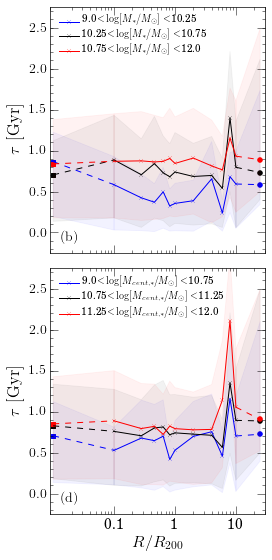

In [55]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(m_bins)-1):
    ax1.plot(r_bins[:-1], bs_m_qsat[:,n], marker='x', color=colours[n], label=r''+str(m_bins[n])+'$ < \log [M_*/M_{\odot}] < $'+str(m_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_m_qsat_min[:,n], y2=bs_m_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.errorbar(r_bins[:-1], bs_m_qsat[:,n], yerr = [bs_m_qsat_min[:,n], bs_m_qsat_max[:,n]], marker='None', fmt='None', ecolor=colours[n], alpha=0.8)
    ax1.plot([0.01, r_bins[0]], [bs_m_qcent[n], bs_m_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_m_qcent_min[n], bs_m_qsat_min[0,n]], y2=[bs_m_qcent_max[n], bs_m_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_m_qsat[-1,n], bs_m_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_m_qsat_min[-1,n], bs_m_qfield_min[n]], y2=[bs_m_qsat_max[-1,n], bs_m_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_m_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_m_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot([r_bins[-4], r_bins[-2]], [bs_m_qsat[-3,n], bs_m_qsat[-1,n]], marker='None', color=colours[n], linewidth=1)
#ax1.fill_between([r_bins[-4], r_bins[-2]], y1=[bs_m_qsat_min[-3, n], bs_m_qsat_min[-1,n]], y2=[bs_m_qsat_max[-3, n], bs_m_qsat_max[-1,n]], color=colours[n], alpha=0.05)
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
#ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.text(0.05, 0.05, r'$\rm(b)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(212)
for n in range(0, len(mc_bins)-1):
    ax1.plot(r_bins[:-1], bs_mc_qsat[:,n], marker='x', color=colours[n], label=r''+str(mc_bins[n])+'$ < \log [M_{cent,*}/M_{\odot}] < $'+str(mc_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mc_qsat_min[:,n], y2=bs_mc_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_mc_qcent[n], bs_mc_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_mc_qsat[-1,n], bs_mc_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_min[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_mc_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_mc_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
#ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(d)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('rate_of_quenching_M*_Mh_new.pdf', facecolor='None', edgecolor='None')

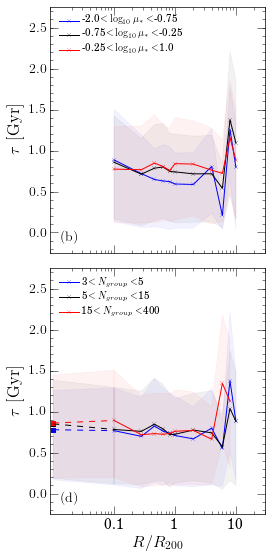

In [56]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(212)
for n in range(0, len(N_bins)-1):
    ax1.plot(r_bins[:-1], bs_N_qsat[:,n], marker='x', color=colours[n], label=r''+str(N_bins[n])+'$ < N_{group} < $'+str(N_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_N_qsat_min[:,n], y2=bs_N_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_N_qcent[n], bs_N_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_N_qcent_min[n], bs_N_qsat_min[0,n]], y2=[bs_N_qcent_max[n], bs_N_qsat_max[0,n]], color=colours[n], alpha=0.05)    
    #ax1.plot([r_bins[-2], 25], [bs_N_qsat[-1,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_N_qsat_min[-1,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-1,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
    ax1.scatter(0.01, bs_N_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_N_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot([r_bins[-5], 25], [bs_N_qsat[-4,n], bs_N_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
#ax1.fill_between([r_bins[-5], 25], y1=[bs_N_qsat_min[-4,n], bs_N_qfield_max[n]], y2=[bs_N_qsat_max[-4,n], bs_N_qfield_min[n]], color=colours[n], alpha=0.05)   
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.text(0.05, 0.05, r'$\rm(d)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_mu_qsat[:,n], marker='x', color=colours[n], label=r''+str(mu_bins[n])+'$ < \log_{10}{\mu_*} < $'+str(mu_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_mu_qsat_min[:,n], y2=bs_mu_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.05)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.05)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.text(0.05, 0.05, r'$\rm(b)$', transform=ax1.transAxes, ha='left', color='k')
ax1.legend(frameon=False, loc=2, fontsize=10)
P.savefig('rate_of_quenching_mu_Ngroup_new.pdf')

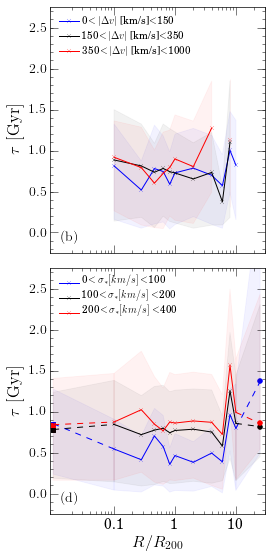

In [57]:
P.figure(figsize=(4, 8))
ax1 = P.subplot(211)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_delv_qsat[:,n], marker='x', color=colours[n], label=r''+str(delv_bins[n])+'$ <|\Delta v|$ [km/s]$ < $'+str(delv_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_delv_qsat_min[:,n], y2=bs_delv_qsat_max[:,n], color=colours[n], alpha=0.05)
    #ax1.plot([0.01, r_bins[0]], [bs_mu_qcent[n], bs_mu_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([0.01, r_bins[0]], y1=[bs_mc_qcent_min[n], bs_mc_qsat_min[0,n]], y2=[bs_mc_qcent_max[n], bs_mc_qsat_max[0,n]], color=colours[n], alpha=0.2)
    #ax1.plot([r_bins[-2], 25], [bs_mu_qsat[-1,n], bs_mu_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=2)
    #ax1.fill_between([r_bins[-2], 25], y1=[bs_mc_qsat_min[-1,n], bs_mc_qfield_max[n]], y2=[bs_mc_qsat_max[-1,n], bs_mc_qfield_min[n]], color=colours[n], alpha=0.2)
    #ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    #ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xticklabels([0.1, 1, 10])
ax1.tick_params(labelbottom='off')
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(b)$', transform=ax1.transAxes, ha='left', color='k')
ax1 = P.subplot(212)
for n in range(0, len(v_bins)-1):
    ax1.plot(r_bins[:-1], bs_v_disp_qsat[:,n], marker='x', color=colours[n], label=r''+str(v_bins[n])+'$ < \sigma_* [km/s] < $'+str(v_bins[n+1]), linewidth=1)
    ax1.fill_between(r_bins[:-1], y1=bs_v_disp_qsat_min[:,n], y2=bs_v_disp_qsat_max[:,n], color=colours[n], alpha=0.05)
    ax1.plot([0.01, r_bins[0]], [bs_v_disp_qcent[n], bs_v_disp_qsat[0,n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([0.01, r_bins[0]], y1=[bs_v_disp_qcent_min[n], bs_v_disp_qsat_min[0,n]], y2=[bs_v_disp_qcent_max[n], bs_v_disp_qsat_max[0,n]], color=colours[n], alpha=0.05)
    ax1.plot([r_bins[-2], 25], [bs_v_disp_qsat[-1,n], bs_v_disp_qfield[n]], marker='None', color=colours[n], linestyle='dashed', linewidth=1)
    ax1.fill_between([r_bins[-2], 25], y1=[bs_v_disp_qsat_min[-1,n], bs_v_disp_qfield_min[n]], y2=[bs_v_disp_qsat_max[-1,n], bs_v_disp_qfield_max[n]], color=colours[n], alpha=0.05)
    ax1.scatter(0.01, bs_v_disp_qcent[n], marker='s', s=20, color=colours[n])
    ax1.scatter(25, bs_v_disp_qfield[n], marker='o', s=20, color=colours[n])
#ax1.plot(r_bins[[-4,-2]], bs_v_disp_qsat[:,0][[-3,-1]], marker='x', color=colours[0], linewidth=1)
#ax1.fill_between(r_bins[[-4,-2]], y1=bs_v_disp_qsat_min[:,0][[-3,-1]], y2=bs_v_disp_qsat_max[:,0][[-3,-1]], color=colours[0], alpha=0.05)
ax1.set_ylabel(r'$\tau$ $\rm{[Gyr]}$')
#ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xscale('log')
ax1.minorticks_on()
ax1.set_xlim(0.009, 30)
ax1.set_ylim(-0.25, 2.75)
ax1.set_xticks([0.1, 1, 10])
ax1.set_xlabel(r'$R/R_{200}$')
ax1.set_xticklabels([0.1, 1, 10])
ax1.legend(frameon=False, loc=2, fontsize=10)
ax1.text(0.05, 0.05, r'$\rm(d)$', transform=ax1.transAxes, ha='left', color='k')
P.tight_layout()
P.savefig('rate_of_quenching_delv_sigma_new.pdf', facecolor='None', edgecolor='None')

### Now let's look at the phase space diagram

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide


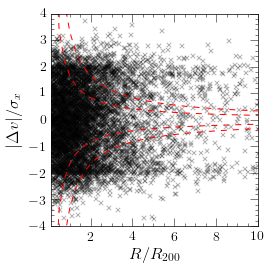

In [58]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(sat['projected cluster centric radius'].to(un.Mpc)/sat['virial radius r200'], sat['delta v from central']/sat['sigma_v'], marker='x', color='k', alpha=0.3)
ax.plot(N.linspace(0, 25, 100), 1/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 25, 100), -1/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 25, 100), 2/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 25, 100), -2/N.linspace(0, 15, 100), linestyle='dashed', color='r')
#ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 10)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$|\Delta v|/\sigma_x$')
#ax.set_xticks([0.1, 1, 10])
#ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('phase_space_satellite_galaxies.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


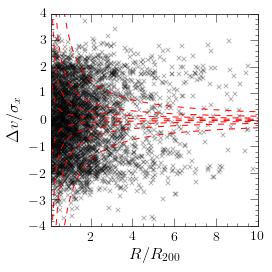

In [278]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central']/qsat['sigma_v'], marker='x', color='k', alpha=0.3)
ax.plot(N.linspace(0, 15, 100), 0.2/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), -0.2/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), 0.64/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), -0.64/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), 1.35/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), -1.35/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), 3/N.linspace(0, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0, 15, 100), -3/N.linspace(0, 15, 100), linestyle='dashed', color='r')
#ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09,10)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$\Delta v/\sigma_x$')
#ax.set_xticks([0.1, 1, 10])
#ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('phase_space_quenched_satellite_galaxies.pdf')

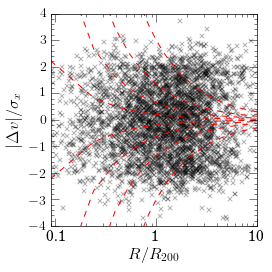

In [60]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.scatter(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central']/qsat['sigma_v'], marker='x', color='k', alpha=0.3)
ax.plot(N.linspace(0.09, 15, 100), 0.2/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), -0.2/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), 0.64/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), -0.64/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), 1.35/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), -1.35/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), 3/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.plot(N.linspace(0.09, 15, 100), -3/N.linspace(0.09, 15, 100), linestyle='dashed', color='r')
ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09,10)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$|\Delta v|/\sigma_x$')
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.tight_layout()
P.savefig('log_phase_space_quenched_satellite_galaxies.pdf')

So how many of these galaxies are outside the r x v = 3 caustic shown by the dashed red line in the plot above?

In [61]:
vsigq = qsat['delta v from central']/qsat['sigma_v']
rr200q = qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200']

In [62]:
(len(N.where(N.logical_or(vsigq*rr200q>3, vsigq*rr200q<-3))[0])/float(len(qsat)))*100

23.03370786516854

So 23% of the quenched satellite galaxies lie outside of the r x v = 3 caustic which Noble+13 defines as the limit for infalling galaxies. 

But what about if we also consider Mahajan et al (2011) - in Figure 15 they show how the measured projected and true physical radius compare with increasing velocity. For v < 1veldisp, the projected measured velocity is quite accurate but above that it starts to deviate by 200%+. How many galxies lie outside the caustic but also have |v/sigma| > 1?


In [63]:
(len(N.where(N.logical_and(N.logical_or(vsigq*rr200q>3, vsigq*rr200q<-3), N.abs(vsigq)>1))[0])/float(len(qsat)))*100

20.786516853932586

So 20% of galaxies probably don't have very accurate projected radii or velocities. What happens if we make all the plots again but don't include those galaxies lying outside of the caustic?

In [64]:
vsig = sat['delta v from central']/sat['sigma_v']
rr200 = sat['projected cluster centric radius'].to(un.Mpc)/sat['virial radius r200']
len(N.where(N.logical_or(vsig*rr200>3,vsig*rr200<-3))[0])/float(len(sat))*100

27.907616167170744

So of all the satellite galaxies (i.e. star forming as well as quenched) we have 28% which lie outside the infall caustic defined by Noble+13. 

### Now what does the phase space diagram looks like when we bin and colour by best fit t?

In [71]:
def histedges_equalN(x, binrange, nbin):
    x = x[N.where(N.logical_and(x > binrange[0], x < binrange[1]))]
    npt = len(x)
    return N.interp(N.linspace(0, npt, nbin + 1), N.arange(npt), N.sort(x))

In [109]:
# vsig_bins = N.linspace(-4, 4, 9)
# rs_bins = N.linspace(0, 5, 11)
rs = qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200']
vsig_bins = histedges_equalN(N.abs(qsat['delta v from central']/qsat['sigma_v']), (0, 4), 10)
rs_bins = histedges_equalN(rs/rs.unit, (0, 5), 10)

In [110]:
bs_ps_t, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central']/qsat['sigma_v'], sat_t_since, bins=(rs_bins, vsig_bins), statistic='median')

In [111]:
bs_ps_t_m = N.ma.masked_where(N.isnan(bs_ps_t),bs_ps_t)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide


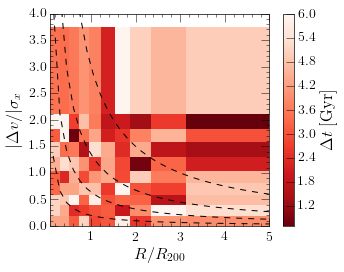

In [125]:
P.figure(figsize=(5,4))
ax = P.subplot(111)
cm = ax.pcolormesh(x, y, bs_ps_t_m.T, cmap=P.cm.Reds_r, vmax=6)
#ax.scatter(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central']/qsat['sigma_v'], marker='x', color='k', alpha=0.1)
ax.plot(N.linspace(0, 15, 100), 0.2/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -0.2/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), 0.64/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -0.64/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), 1.35/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -1.35/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), 3/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -3/N.linspace(0, 15, 100), linestyle='dashed', color='k')
#ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 5)
ax.set_ylim(0, 4)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$|\Delta v/|\sigma_x$')
#ax.set_xticks([0.1, 1, 10])
#ax.set_xticklabels([0.1, 1, 10])
cb = P.colorbar(cm)
cb.set_label(r'$\Delta t$ $\rm{[Gyr]}$')
P.tight_layout()
P.savefig('phase_space_binned_best_fit_t_quenched_satellite_galaxies.pdf')

There is possibly a debatable amount of evidence here for more recent quenching having occured on the outskirts of the groups where the galaxies are currently infalling. However in the figure below for the median tau we don't see any dependence on the rate that this is occuring. As expected, galaxies closer in towards the centre of the groups have quenched much earlier. 

We must think about what the locations on this phase space diagram mean since we have projection issues. Firstly, in Maahajan, Mamon & Raychaudbury (2011), their simulations show how the measured projected radius deviates from the true radius with increasing velocity. Below a true radius, R < 1 the two match quite well, but at higher R and with increasing velocity the measured value deviates from the true radius. Also projection effects affect the measured velocity. At small radius, measured small velocities could actually be truly large and at high radius, high velocities may mean that the galaxy isn't even part of the group. 

### And what does the phase space look like when binned in best fit tau?

In [113]:
bs_ps_tau, x, y, n = bs2d(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central']/qsat['sigma_v'], qsat['best fit tau'], bins=(rs_bins, vsig_bins), statistic='median')

In [114]:
bs_ps_tau_m = N.ma.masked_where(N.isnan(bs_ps_tau),bs_ps_tau)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide


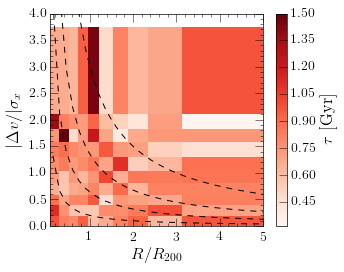

In [124]:
P.figure(figsize=(5,4))
ax = P.subplot(111)
cm = ax.pcolormesh(x, y, bs_ps_tau_m.T, cmap=P.cm.Reds, vmax=1.5)
#ax.scatter(qsat['projected cluster centric radius'].to(un.Mpc)/qsat['virial radius r200'], qsat['delta v from central']/qsat['sigma_v'], marker='x', color='k', alpha=0.1)
ax.plot(N.linspace(0, 15, 100), 0.2/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -0.2/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), 0.64/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -0.64/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), 1.35/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -1.35/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), 3/N.linspace(0, 15, 100), linestyle='dashed', color='k')
ax.plot(N.linspace(0, 15, 100), -3/N.linspace(0, 15, 100), linestyle='dashed', color='k')
#ax.set_xscale('log')
ax.minorticks_on()
ax.set_xlim(0.09, 5)
ax.set_ylim(0, 4)
ax.set_xlabel(r'$R/R_{200}$')
ax.set_ylabel(r'$|\Delta v/|\sigma_x$')
#ax.set_xticks([0.1, 1, 10])
#ax.set_xticklabels([0.1, 1, 10])
cb = P.colorbar(cm)
cb.set_label(r'$\tau$ $\rm{[Gyr]}$')
P.tight_layout()
P.savefig('phase_space_binned_best_fit_tau_quenched_satellite_galaxies.pdf')

### Steven asked what does the distribution of N group look like? 

Here we must look at the distirbution of the number in the group for the groups rather than the galaxies themselves. Otherwise the distribution would be skewed by the fact that those groups with larger N will have more galaxies with that N than a group with only 3 galaxies. We need ot look at the number of groups with that number of N.

We can also compare this distribution for those galaxies which are inside the caustics. 

In [90]:
caustic_qsat = qsat[N.where(N.logical_and(vsigq*rr200q<3, vsigq*rr200q>-3))]

In [91]:
groupinfo = qsat[N.unique(qsat['groupID'], return_index=True)[1]]
caustic_groupinfo = caustic_qsat[N.unique(caustic_qsat['groupID'], return_index=True)[1]]

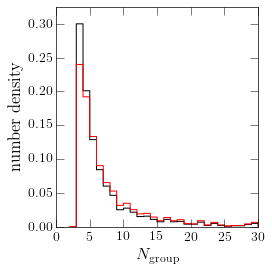

In [92]:
P.figure(figsize=(4,4))
P.hist(groupinfo['N group'], range=(2, 30), bins=28, histtype='step', normed=True)
P.hist(caustic_groupinfo['N group'], range=(2, 30), bins=28, histtype='step', color='r', normed=True)
P.xlabel(r'$N_{\rm{group}}$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.ylim(0, 0.325)
P.savefig('unique_number_in_group_distribution_compare_caustic.pdf')

First let's look at the mean, [-sigma, median, sigma], standard deviation, minimum and maximum 'N group' for the groups distribution of N. 

In [93]:
print N.mean(groupinfo['N group']), N.percentile(groupinfo['N group'], [16, 50, 84]), N.std(groupinfo['N group']), N.min(groupinfo['N group']), N.max(groupinfo['N group'])

7.13205351949 [  3.   5.  10.] 10.4936065704 3 311


Now let's look at the mean, [-sigma, median, sigma], standard deviation, minimum and maximum 'N group' for the galaxies distribution of N. Remember that this will be skewed by the fact that for groups with larger N there will be more galaxies with that N. 

In [94]:
print N.mean(qsat['N group']), N.percentile(qsat['N group'], [16, 50, 84]), N.std(qsat['N group']), N.min(qsat['N group']), N.max(qsat['N group'])

25.6767109295 [  4.   8.  29.] 59.8953435141 3 311


Similary, what is the mass distribution of quenched satellites for the full sample and those inside the caustic?

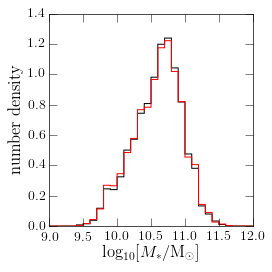

In [95]:
P.figure(figsize=(4,4))
P.hist(qsat['AVG_MASS_1'], range=(9.0, 12.0), bins=30, histtype='step', normed=True)
P.hist(caustic_qsat['AVG_MASS_1'], range=(9.0, 12.0), bins=30, histtype='step', color='r', normed=True)
P.xlabel(r'$\log_{10}[M_*/\rm{M}_{\odot}]$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_mass_distribution_compare_caustic.pdf')

And similarly what about the distirbution of the central galaxy mass, mu_*, sigma_*, velocity and morphology of the quenched galaxies and those inside the caustic?

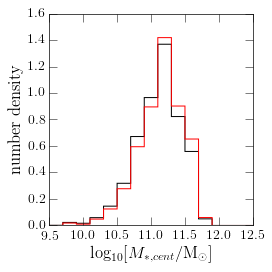

In [96]:
P.figure(figsize=(4,4))
P.hist(qsat['stellar mass of central'], range=(9.5, 12.5), bins=15, histtype='step', normed=True)
P.hist(caustic_qsat['stellar mass of central'], range=(9.5, 12.5), bins=15, histtype='step', color='r', normed=True)
P.xlabel(r'$\log_{10}[M_{*, cent}/\rm{M}_{\odot}]$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_central_mass_distribution_compare_caustic.pdf')

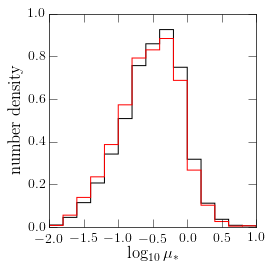

In [97]:
P.figure(figsize=(4,4))
P.hist(N.log10(10**(qsat['AVG_MASS_1'])/10**(qsat['stellar mass of central'])), range=(-2, 1), bins=15, histtype='step', normed=True)
P.hist(N.log10(10**(caustic_qsat['AVG_MASS_1'])/10**(caustic_qsat['stellar mass of central'])), range=(-2,1), bins=15, histtype='step', color='r', normed=True)
P.xlabel(r'$\log_{10}\mu_*$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_mu_distribution_compare_caustic.pdf')

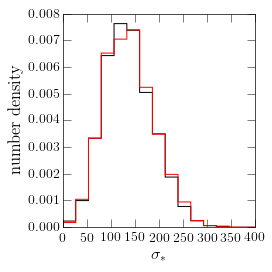

In [98]:
P.figure(figsize=(4,4))
P.hist(qsat['V_DISP_1'], range=(0, 400), bins=15, histtype='step', normed=True)
P.hist(caustic_qsat['V_DISP_1'], range=(0, 400), bins=15, histtype='step', color='r', normed=True)
P.xlabel(r'$\sigma_*$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_stellar_vel_disp_distribution_compare_caustic.pdf')

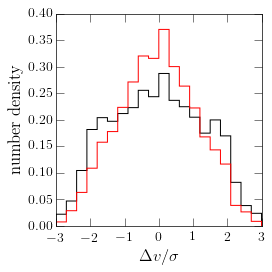

In [99]:
P.figure(figsize=(4,4))
P.hist(qsat['delta v from central']/qsat['sigma_v'], range=(-3, 3), bins=20, histtype='step', normed=True)
P.hist(caustic_qsat['delta v from central']/caustic_qsat['sigma_v'], range=(-3, 3), bins=20, histtype='step', color='r', normed=True)
P.xlabel(r'$\Delta v / \sigma$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_delta_v_over_sigma_distribution_compare_caustic.pdf')

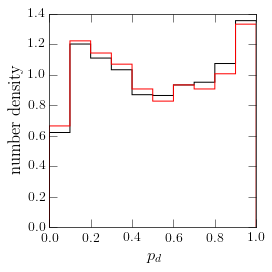

In [100]:
P.figure(figsize=(4,4))
P.hist(qsat['t01_smooth_or_features_a02_features_or_disk_debiased'], range=(0, 1), bins=10, histtype='step', normed=True)
P.hist(caustic_qsat['t01_smooth_or_features_a02_features_or_disk_debiased'], range=(0, 1), bins=10, histtype='step', color='r', normed=True)
P.xlabel(r'$p_d$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_p_d_distribution_compare_caustic.pdf')

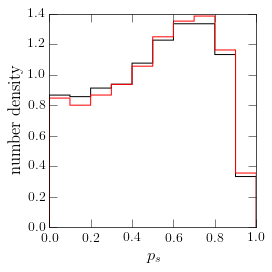

In [101]:
P.figure(figsize=(4,4))
P.hist(qsat['t01_smooth_or_features_a01_smooth_debiased'], range=(0, 1), bins=10, histtype='step', normed=True)
P.hist(caustic_qsat['t01_smooth_or_features_a01_smooth_debiased'], range=(0, 1), bins=10, histtype='step', color='r', normed=True)
P.xlabel(r'$p_s$')
P.ylabel(r'$\rm{number}$ $\rm{density}$')
P.savefig('quenched_satellite_p_s_distribution_compare_caustic.pdf')

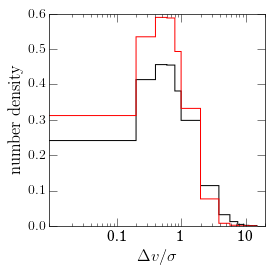

In [102]:
P.figure(figsize=(4,4))
ax = P.subplot(111)
ax.hist(qsat['projected cluster centric radius'].to(u.Mpc)/qsat['virial radius r200'], bins=logbins, histtype='step', normed=True)
ax.hist(caustic_qsat['projected cluster centric radius'].to(u.Mpc)/caustic_qsat['virial radius r200'], bins=logbins, histtype='step', color='r', normed=True)
ax.set_xscale('log')
ax.set_xlabel(r'$\Delta v / \sigma$')
ax.set_ylabel(r'$\rm{number}$ $\rm{density}$')
ax.set_xlim(0.009, 20)
ax.set_xticks([0.1, 1, 10])
ax.set_xticklabels([0.1, 1, 10])
P.savefig('quenched_satellite_r_over_r200_distribution_compare_caustic.pdf')